In [41]:
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_3 as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib_3' from '/home/marie-anne/code/Oct20_EPRI/Task3/NB/epri_mc_lib_3.py'>

In [42]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)
data_GAN = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival_2.csv'),
                  index_col=None)

data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

data_GAN_x = data_GAN.iloc[:, 2:]
data_GAN_y = data_GAN.iloc[:, 0:2]

In [59]:
merge = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_on_sample.csv'), 
                   index_col=0)
merge.loc[merge.F_Time.isna(), 'unfailed_cycle'] = merge.NDE_cycle
merge['failure'] = merge.failure_cycle
merge.failure = merge.failure.fillna(merge.unfailed_cycle)
merge.dropna(subset=['failure'], inplace=True)
merge.drop(['failure_cycle', 'unfailed_cycle', 'F_Fraction', 'F_Time'], axis=1, inplace=True)

In [60]:
merge

,NDE_cycle,Observed,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_51_119,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58,failure
ID,,,,,,,,,,,,,,,
41C,0,True,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,1.931463,5.576476,190.979294,-0.137640,-2.866030,4.804749,2154137.0
43C,0,False,1.396620,0.996217,1.005710,1.393382,0.878759,1.115332,1.856026,3.422903,184.930215,-0.462040,-2.254125,3.869428,0.0
44C,0,True,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,1.862064,4.619563,187.204261,-0.596385,-2.788500,3.370729,1318034.0
45C,0,False,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,1.824140,3.458337,189.010633,-0.645710,-3.202220,4.186639,3245267.0
7C,150000,False,0.385614,1.305600,1.002897,1.109924,0.936855,1.139517,1.921707,4.720874,179.123964,-1.135960,-1.718115,3.438451,150000.0
13C,150000,False,1.163056,1.237837,1.002948,1.109720,0.919655,1.101159,1.966083,9.687991,170.130491,-0.660875,-2.167395,3.725514,150000.0
8C,150000,False,0.820318,1.319565,0.996523,0.697468,0.933717,1.135902,1.938773,3.477006,169.866095,-0.951840,-1.502545,3.529319,150000.0
35C,150000,False,0.346770,1.188801,1.002494,0.688566,0.967767,1.163921,1.887154,3.760074,171.321012,-0.867430,-1.350065,3.050650,150000.0
24C,300000,False,0.588694,1.061223,1.005517,1.030618,0.844482,1.030615,1.927292,5.064456,174.454983,-0.816755,-1.836935,4.259982,1630000.0


Text(0.5, 0, 'Total cycle run')

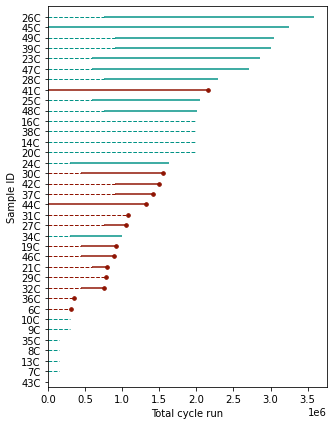

In [64]:
_, ax = plt.subplots(figsize=(5,7))
plot_lifetimes(
    merge['failure'] - merge['NDE_cycle'],
    event_observed=merge['Observed'],
    entry=merge['NDE_cycle'],
    event_observed_color="#8f1402",
    event_censored_color="#029386",
    left_truncated=True,
)
plt.ylabel('Sample ID')
plt.xlabel('Total cycle run')

Text(0, 0.5, 'est. probability of survival $\\hat{S}(t)$')

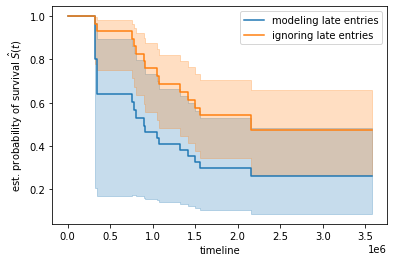

In [66]:
kmf = KaplanMeierFitter()
kmf.fit(merge['failure'], event_observed = merge['Observed'], entry=merge['NDE_cycle'], label='modeling late entries')
ax = kmf.plot()

kmf.fit(merge['failure'], event_observed = merge['Observed'], label='ignoring late entries')
kmf.plot(ax=ax)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
